# Exercise 4.10

# Index

01 Imprting Libraries

02 Importing Data

03 Create Regional Segments

04 Create Exclusion Flag for Low-Activity Customers

05 Create Profiling Variable



# 01. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [3]:
# create path
path = r'C:\Users\kthav\My Pc\Desktop\Career Foundry\Data Immersion\Python Fundamentals for Data Analytics\11-12-2024 Instacart Basket Analysis'

In [6]:
path


'C:\\Users\\kthav\\My Pc\\Desktop\\Career Foundry\\Data Immersion\\Python Fundamentals for Data Analytics\\11-12-2024 Instacart Basket Analysis'

In [8]:
# import instacart_orders_products_customers_merged.pkl as df_opcm
df_opcm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_orders_products_customers_merged.pkl'))

In [10]:
#check shape
df_opcm.shape

(32246709, 33)

In [14]:
# check head
df_opcm.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,2398795,1,2,3,7,15.0,False,10258,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,2398795,1,2,3,7,15.0,False,12427,3,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2398795,1,2,3,7,15.0,False,13176,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2398795,1,2,3,7,15.0,False,26088,5,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
# check columns
column_names = df_opcm.columns.tolist()
print(column_names)

['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order', 'first_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge', 'busiest_day', 'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age', 'date_joined', 'dependants', 'marital_status', 'income']


In [12]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_cleaned.csv'))

In [ ]:
# check head
dept

In [14]:
# drop column 'Unnamed: 0'
dept_clean = dept.drop(columns=['Unnamed: 0'])


In [16]:
dept_clean

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 03. Create Regional Segments

In [18]:
# Create a dictionary mapping states to regions
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Pennsylvania': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',

    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest', 
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 
    'Arkansas': 'South', 'Louisiana': 'South',

    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 
    'New Mexico': 'West', 'Alaska': 'West', 'Washington': 'West', 
    'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}




In [20]:
# Use map to assign regions based on the state
df_opcm['region'] = df_opcm['state'].map(state_to_region)

In [22]:
df_opcm.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,2398795,1,2,3,7,15.0,False,10258,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,2398795,1,2,3,7,15.0,False,12427,3,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2398795,1,2,3,7,15.0,False,13176,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2398795,1,2,3,7,15.0,False,26088,5,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [33]:
# Crosstab Region to Spending Flag (income)
crosstab = pd.crosstab(df_opcm['region'], df_opcm['spender_flag'], dropna = False)

In [35]:
# copy to clipboard for excel analysis
crosstab.to_clipboard()

In [37]:
# export df_opcm as orders_products_customers_region.pkl
df_opcm.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_customers_region.pkl'))

# 04. Create Exclusion Flag for Low-Activity Customers

In [24]:
# Create flag for low-activity customers (less than 5 orders) and high-activity customers (greater than or equal to 5)
df_opcm.loc[df_opcm['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_opcm.loc[df_opcm['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [26]:
df_opcm['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30812998
low-activity customer      1433711
Name: count, dtype: int64

In [28]:
# exclude low-activity cusstomers from the dataframe
df_la_excluded = df_opcm[df_opcm['activity_flag'] != 'low-activity customer']

In [37]:
df_la_excluded.shape

(30812998, 35)

In [42]:
# export df_la_excluded as low_activity_customers_excluded.pkl
df_la_excluded.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers_excluded.pkl'))

# 05. Create Profiling Variable 

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [30]:
# Age-based categorization
def categorize_age(age):
    if age < 60:
        return 'Adult'
    else:
        return 'Older Adult'

# Apply age-based categorization
df_la_excluded['age_group'] = df_la_excluded['age'].apply(categorize_age)


C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\3052870199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_la_excluded['age_group'] = df_la_excluded['age'].apply(categorize_age)


In [32]:
# Income-based categorization
def categorize_income(income):
    if income < 200000:
        return 'Low'
    else:
        return 'Medium-High'

# Apply income-based categorization
df_la_excluded['income_bracket'] = df_la_excluded['income'].apply(categorize_income)


C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\1466381273.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_la_excluded['income_bracket'] = df_la_excluded['income'].apply(categorize_income)


In [34]:
# Dependents-based categorization
def categorize_dependents(dependants):
    if dependants == 0:
        return 'No Dependents'
    else:
        return 'Dependents'

# Apply dependents-based categorization
df_la_excluded['dependents'] = df_la_excluded['dependants'].apply(categorize_dependents)


C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\3459990878.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_la_excluded['dependents'] = df_la_excluded['dependants'].apply(categorize_dependents)


In [36]:
# Combine age, income, and dependents into a customer profile
df_la_excluded['customer_profile'] = (
    df_la_excluded['age_group'] + ', ' +
    df_la_excluded['income_bracket'] + ' Income, ' +
    df_la_excluded['dependents']
)




C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\2560160837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_la_excluded['customer_profile'] = (


In [42]:
# Count distribution of profiles
profile_counts = df_la_excluded['customer_profile'].value_counts()


In [40]:
profile_counts

customer_profile
Adult, Low Income, Dependents                     15123726
Older Adult, Low Income, Dependents                7804520
Adult, Low Income, No Dependents                   5030574
Older Adult, Low Income, No Dependents             2603511
Adult, Medium-High Income, Dependents               103093
Older Adult, Medium-High Income, Dependents          84039
Adult, Medium-High Income, No Dependents             39842
Older Adult, Medium-High Income, No Dependents       23693
Name: count, dtype: int64

In [38]:
# export df_la_excluded as instacart_final.pkl
df_la_excluded.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_final.pkl'))

# 06. Analysis and Visualisations

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.


In [38]:
# Set the path to save visuals
output_path = 'C:\\Users\\kthav\\My Pc\\Desktop\\Career Foundry\\Data Immersion\\Python Fundamentals for Data Analytics\\11-12-2024 Instacart Basket Analysis\\Analysis\\Visualisations'

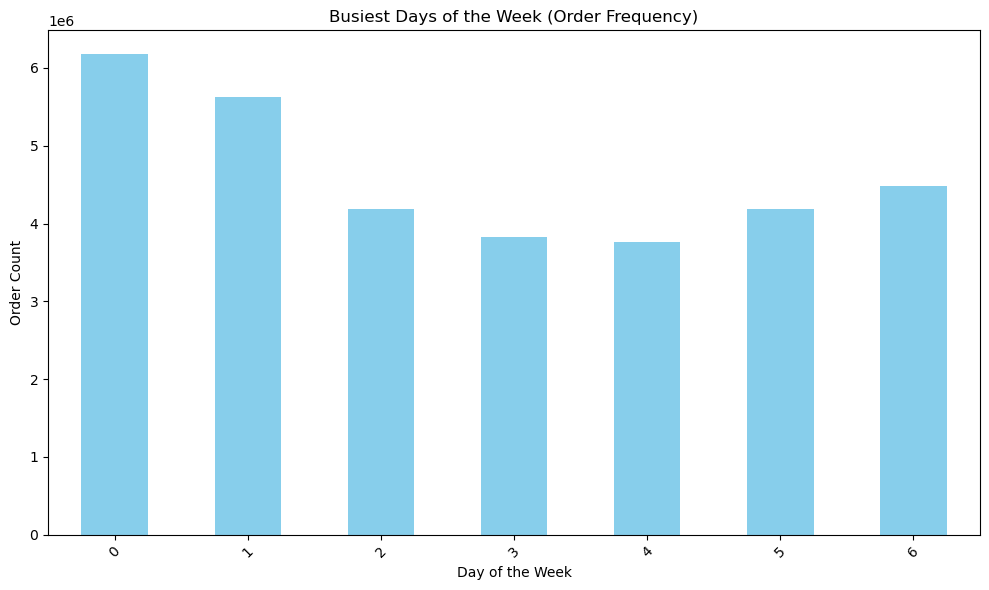

In [124]:
# 1. Busiest Days of the Week (Order Frequency)
plt.figure(figsize=(10,6))
df_opcm['orders_day_of_week'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Busiest Days of the Week (Order Frequency)')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'busiest_days_of_week.png')
plt.show()

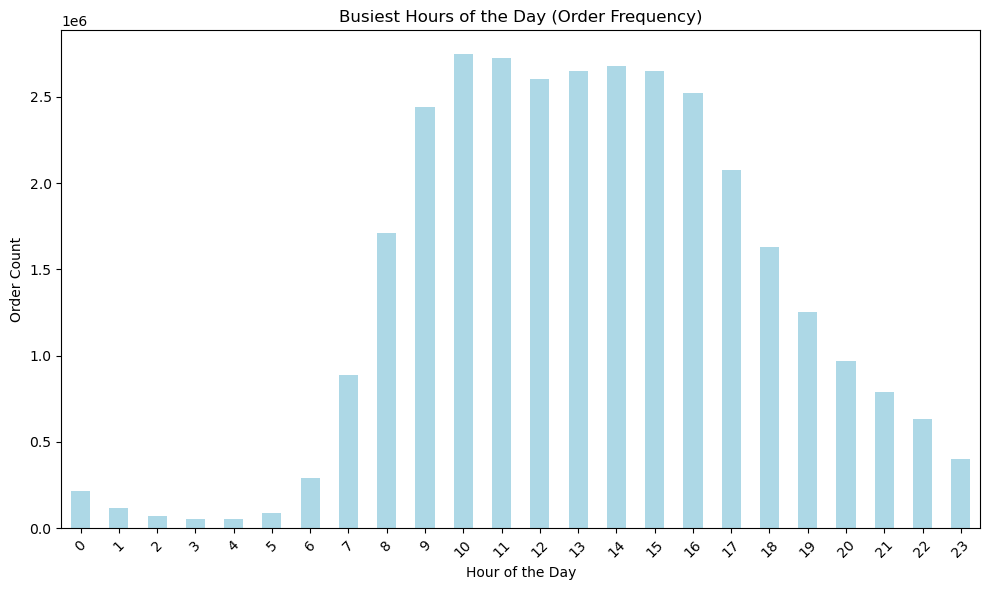

In [130]:
# 1. Busiest Hours of the Day (Order Frequency)
plt.figure(figsize=(10,6))
df_opcm['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Busiest Hours of the Day (Order Frequency)')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'busiest_hours_of_day.png')
plt.show()

They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

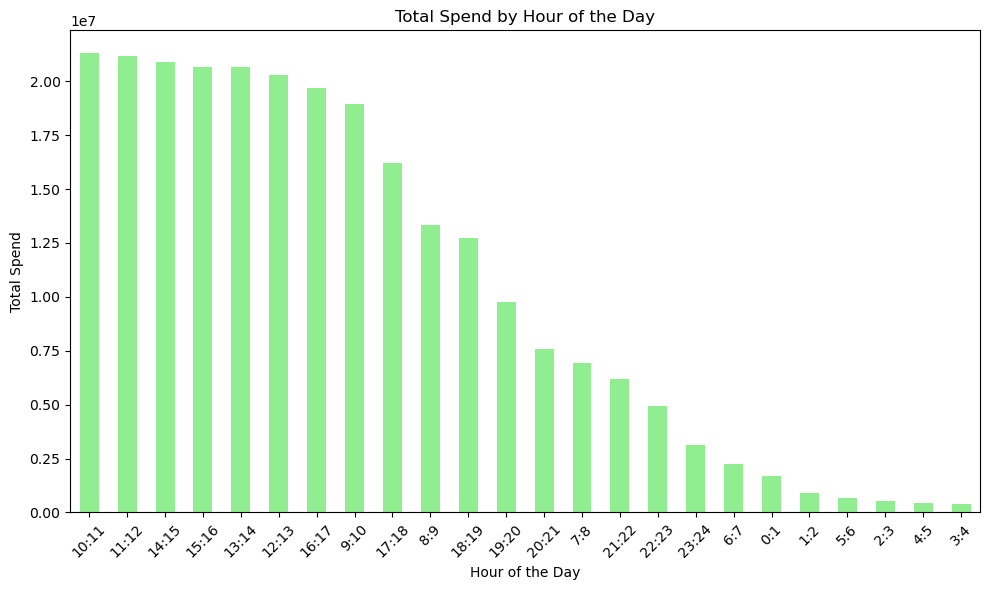

In [144]:
# 2. Time of Day with Most Money Spent
df_opcm['hour_spent'] = df_opcm['order_hour_of_day'].astype(str) + ':' + (df_opcm['order_hour_of_day'] + 1).astype(str)
hourly_spend = df_opcm.groupby('hour_spent')['prices'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
hourly_spend.plot(kind='bar', color='lightgreen')
plt.title('Total Spend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'total_spend_by_hour.png')
plt.show()


Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.


In [45]:
# Subset DataFrame to only include 'prices' column to save memory
df_prices = df_opcm[['prices']].copy()

In [47]:
# Define price bins and labels
price_bins = [0, 5, 10, 15, 20, 25, 30]  
price_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

In [49]:
# Create a new column 'price_range' using pd.cut
df_prices['price_range'] = pd.cut(df_prices['prices'], bins=price_bins, labels=price_labels, right=False)

C:\Users\kthav\AppData\Local\Temp\ipykernel_5604\3578483669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_prices, palette='coolwarm')


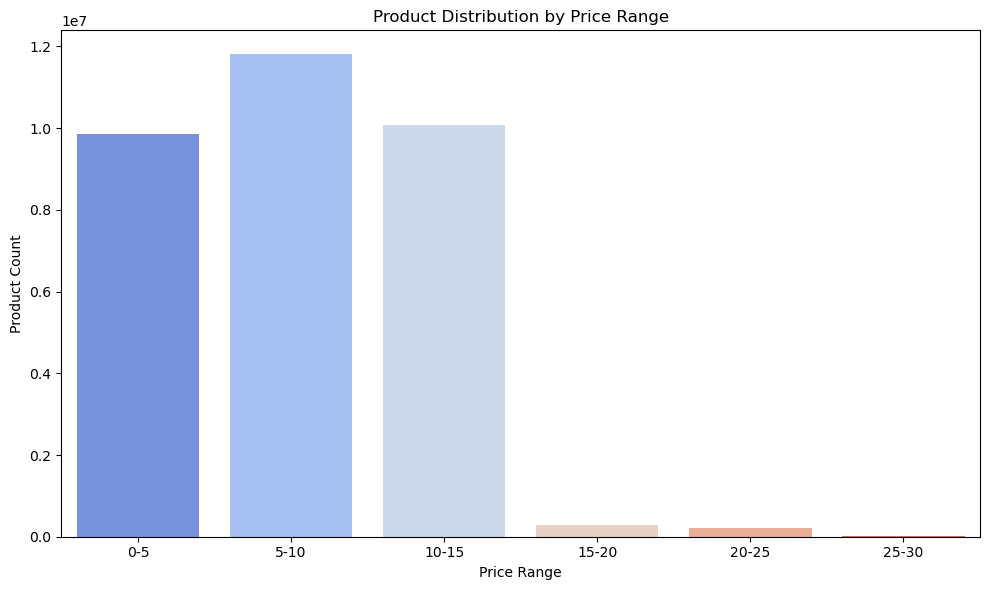

In [80]:
# Plot the distribution of price ranges
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df_prices, palette='coolwarm')
plt.title('Product Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Product Count')
plt.tight_layout()
# Save and show the plot
plt.savefig(output_path + 'most_popular_departments.png')
plt.show()
# Show the plot
plt.show()

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [70]:
# Step 1: Drop unnecessary columns from df_opcm
df_opcm_reduced = df_opcm[['department_id']]  

In [72]:
# Step 2: Merge with dept_clean to get department names
df_merged = df_opcm_reduced.merge(dept_clean, on='department_id', how='left')

C:\Users\kthav\AppData\Local\Temp\ipykernel_5604\2658109388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_counts.index, y=department_counts.values, palette='Set2')


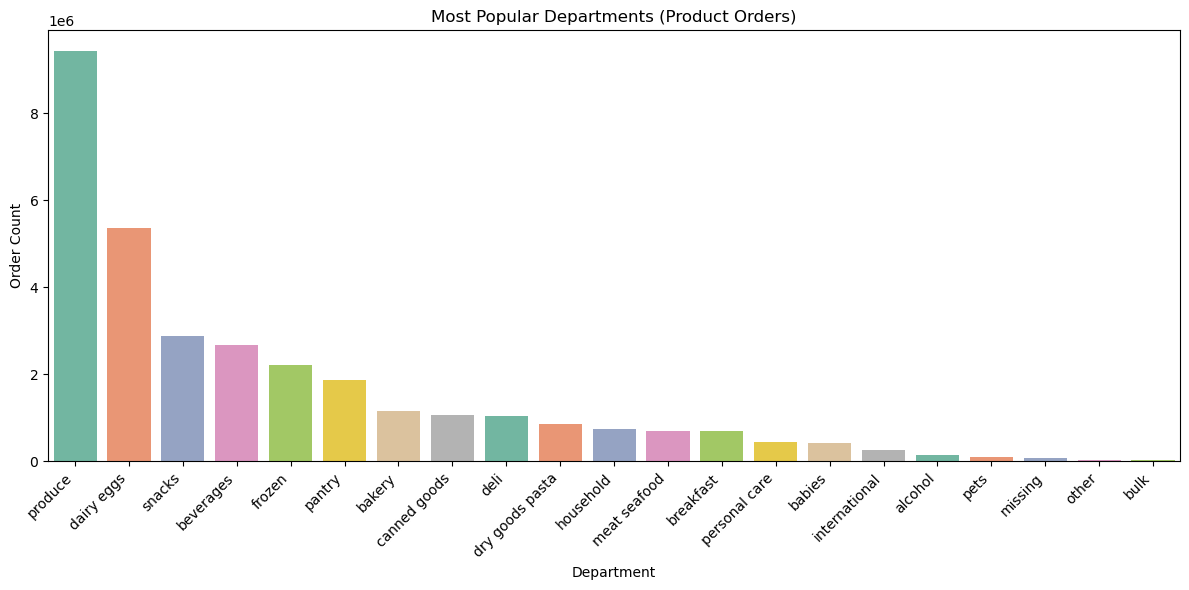

In [78]:
# Step 3: Plot Most Popular Departments
plt.figure(figsize=(12, 6))
department_counts = df_merged['department'].value_counts(ascending=False)
sns.barplot(x=department_counts.index, y=department_counts.values, palette='Set2')
plt.title('Most Popular Departments (Product Orders)')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()

# Save and show the plot
plt.savefig(output_path + 'most_popular_departments.png')
plt.show()



What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [83]:
# Subset the DataFrame to include only the necessary column
df_loyalty = df_opcm[['loyalty_flag']].copy()

In [85]:
# Calculate the loyalty counts
loyalty_counts = df_loyalty['loyalty_flag'].value_counts()

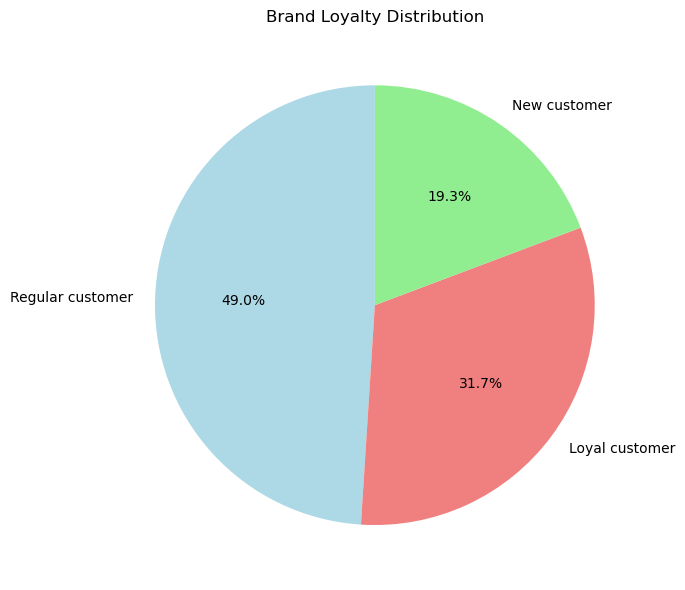

In [87]:
# Create the pie chart
plt.figure(figsize=(8, 6))
loyalty_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['lightblue', 'lightcoral', 'lightgreen'],  # Add more colors if needed
    startangle=90,  # Start at the top of the circle
    labels=loyalty_counts.index  # Ensure labels match loyalty_flag values
)
plt.title('Brand Loyalty Distribution')
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.tight_layout()

# Save and show the plot
plt.savefig(output_path + 'brand_loyalty_distribution.png')
plt.show()

Are there differences in ordering habits based on a customer’s loyalty status?

In [72]:
# Merge df_la_excluded with dept_clean on 'department_id', keeping only relevant columns
df_merged = pd.merge(
    df_la_excluded[['loyalty_flag', 'department_id']],  # Only include necessary columns
    dept_clean[['department_id', 'department']],  # Ensure 'department' is accessible
    on='department_id',
    how='inner'
)

In [74]:
# Aggregate data: Count department purchases by loyalty_flag
df_dept_loyalty = (
    df_merged.groupby(['loyalty_flag', 'department'])
    .size()
    .reset_index(name='purchase_count')
)

In [76]:
# Sort within each loyalty_flag to get the most popular departments
df_top_departments = df_dept_loyalty.sort_values(
    by=['loyalty_flag', 'purchase_count'], ascending=[True, False]
)


In [78]:
# Display top 5 departments per loyalty flag
top_n = 5
df_top_n_departments = (
    df_top_departments.groupby('loyalty_flag')
    .head(top_n)
    .reset_index(drop=True)
)

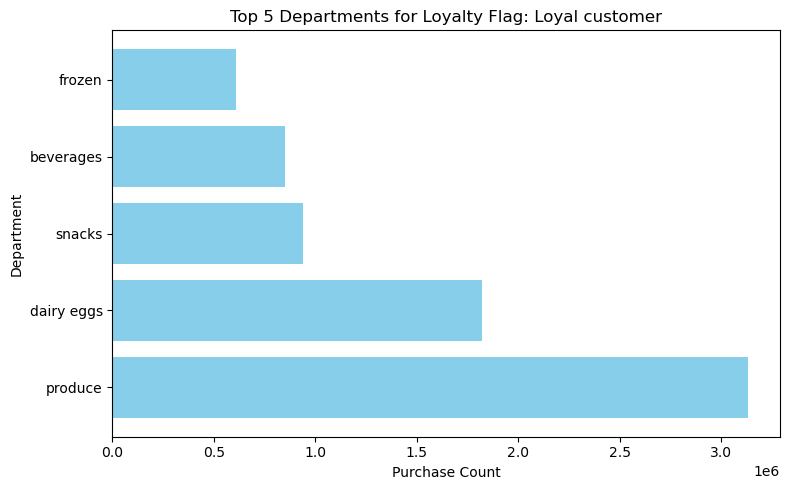

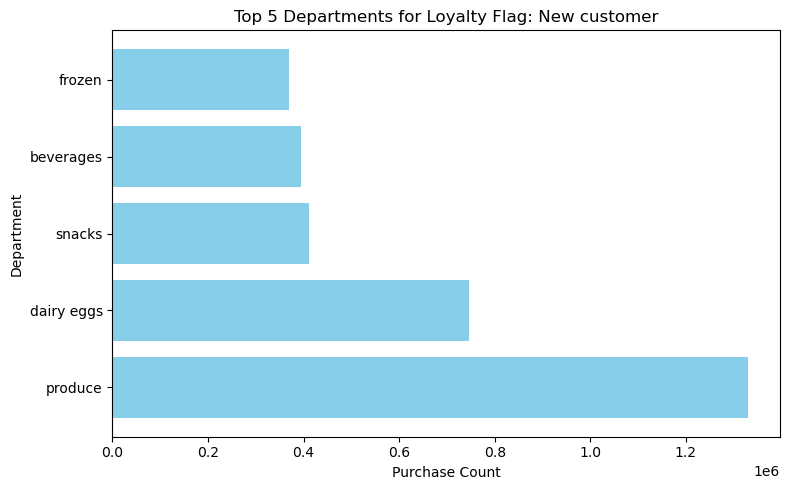

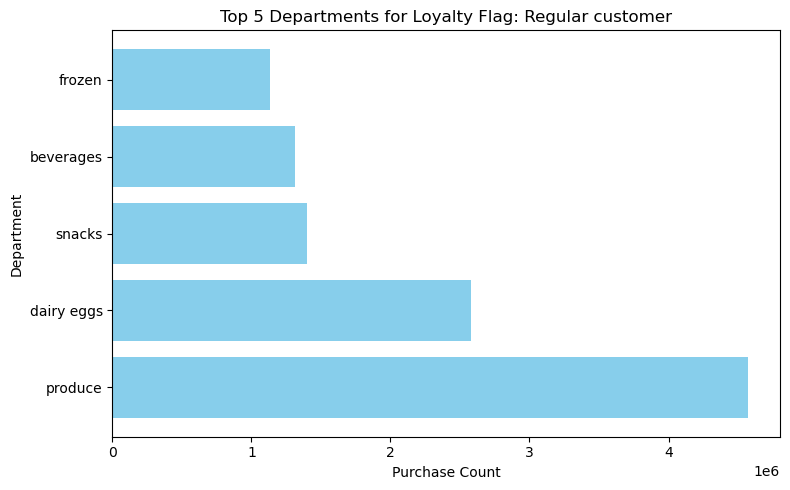

In [92]:
# Plotting and saving charts
loyalty_flags = df_top_n_departments['loyalty_flag'].unique()
for flag in loyalty_flags:
    df_flag = df_top_n_departments[df_top_n_departments['loyalty_flag'] == flag]
    
    # Create bar chart
    plt.figure(figsize=(8, 5))
    plt.barh(df_flag['department'], df_flag['purchase_count'], color='skyblue')
    plt.title(f'Top {top_n} Departments for Loyalty Flag: {flag}')
    plt.xlabel('Purchase Count')
    plt.ylabel('Department')
    plt.tight_layout()
    
    # Save the chart
    file_name = f"{output_path}top_{top_n}_departments_loyalty_flag_{flag}.png"
    plt.savefig(file_name, dpi=300)
   

Are there differences in ordering habits based on a customer’s region?															

In [56]:
# Subset the DataFrame to include only the necessary columns
df_region_avg_spend = df_la_excluded[['region', 'average_spend']].copy()

In [62]:
# Calculate the average spend per region
region_avg_spend = df_region_avg_spend.groupby('region')['average_spend'].sum().sort_values(ascending=False)

C:\Users\kthav\AppData\Local\Temp\ipykernel_13812\2001176938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_spend.index, y=region_avg_spend.values, palette='viridis')


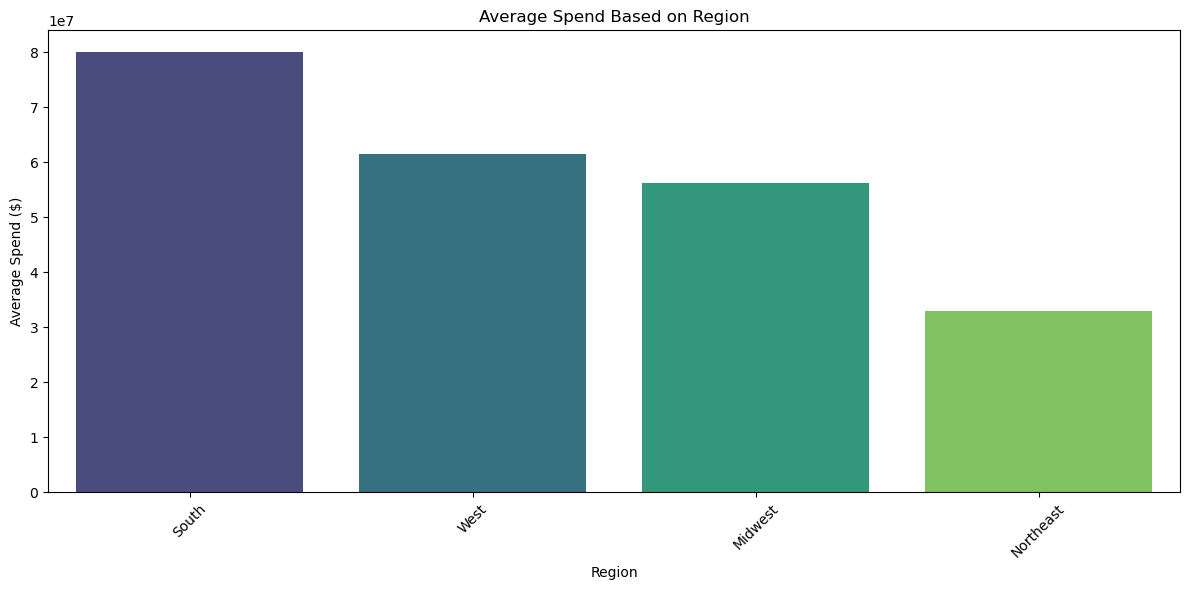

In [68]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg_spend.index, y=region_avg_spend.values, palette='viridis')
plt.title('Average Spend Based on Region')
plt.xlabel('Region')
plt.ylabel('Average Spend ($)')
plt.xticks(rotation=45)  
plt.tight_layout()

# Save and display the plot
plt.savefig(output_path + 'average_spend_based_on_region.png')
plt.show()

 Is there a connection between age and family status in terms of ordering habits?

What different classiﬁcations does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [42]:
# Select relevant columns
df_reduced = df_la_excluded[['customer_profile', 'product_id', 'order_id', 'department_id']]

In [44]:
# Step 2: Merge the DataFrames on department_id
merged_df = df_reduced.merge(dept_clean, on='department_id', how='left')

In [46]:
#  Aggregate data
profile_dept_summary = merged_df.groupby(['customer_profile', 'department']).agg({
    'order_id': 'count'  # Total number of orders
}).reset_index()

In [48]:
# Rename columns for clarity
profile_dept_summary.rename(columns={'order_id': 'total_orders'}, inplace=True)

In [50]:
# Sort the data for analysis
profile_dept_summary = profile_dept_summary.sort_values(by=['customer_profile', 'total_orders'], ascending=[True, False])


In [54]:
# Pivot the DataFrame for visualization
pivot_table = profile_dept_summary.pivot(index='department', columns='customer_profile', values='total_orders')

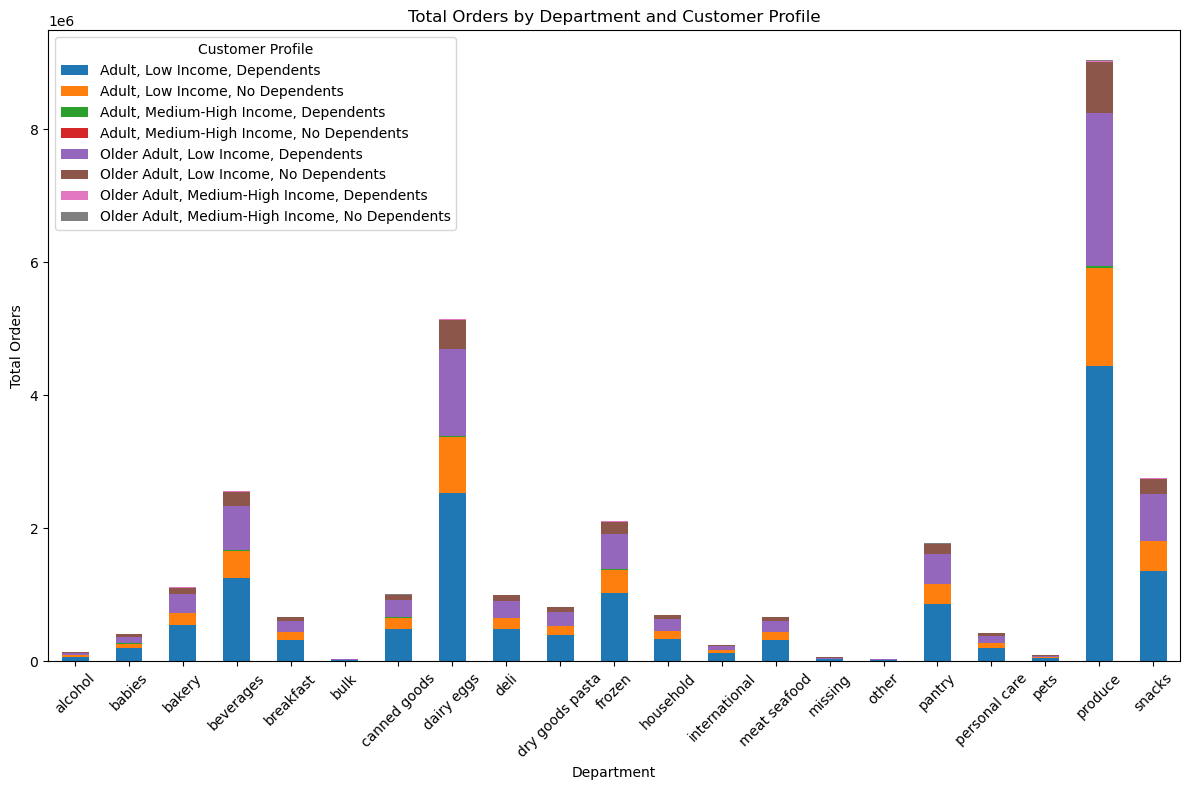

In [90]:
# Create a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Orders by Department and Customer Profile')
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.legend(title='Customer Profile')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the stacked bar chart (save BEFORE showing the plot)
bar_chart_path = output_path + '\\total_orders_by_department_and_profile.png'
plt.savefig(bar_chart_path, dpi=300)  # Ensure the image is saved in high resolution

# Show the chart
plt.show()

Is there a connection between age and family status in terms of ordering habits?

In [40]:
#  Reduce dataframe to only necessary columns
relevant_columns = ['age', 'marital_status', 'order_number']
df_reduced = df_la_excluded[relevant_columns]

In [42]:
# Create age groups for easier visualization
df_reduced['age_group'] = pd.cut(df_reduced['age'], bins=[18, 30, 45, 60, 80], 
                                 labels=['18-30', '31-45', '46-60', '61+'])

C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\1945419575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['age_group'] = pd.cut(df_reduced['age'], bins=[18, 30, 45, 60, 80],


C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\2154269705.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age = df_reduced.groupby('age_group')['order_number'].sum().reset_index()
C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\2154269705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='order_number', data=orders_by_age, palette='Blues_d')


Bar chart for orders by age group saved at: C:\Users\kthav\My Pc\Desktop\Career Foundry\Data Immersion\Python Fundamentals for Data Analytics\11-12-2024 Instacart Basket Analysis\Analysis\Visualisations\barchart_orders_by_age_group.png


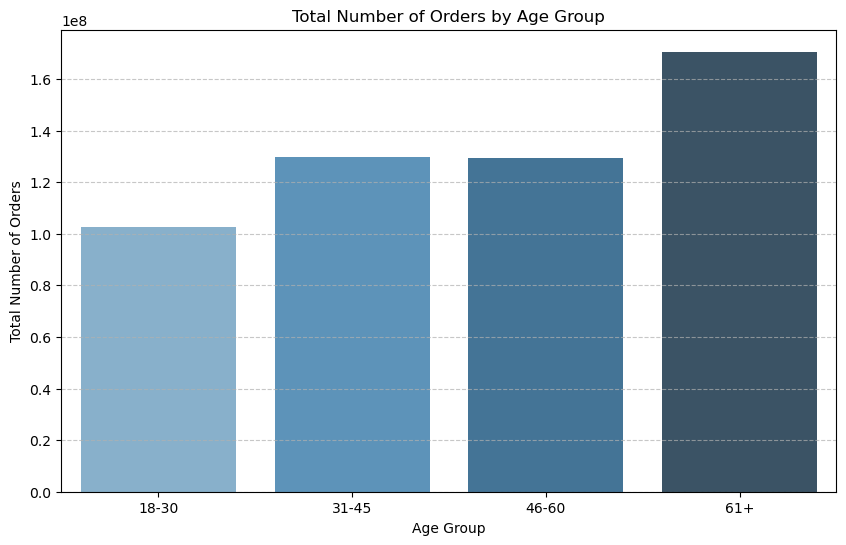

In [44]:
# Bar Chart - Total Orders by Age Group
plt.figure(figsize=(10, 6))
orders_by_age = df_reduced.groupby('age_group')['order_number'].sum().reset_index()
sns.barplot(x='age_group', y='order_number', data=orders_by_age, palette='Blues_d')
plt.title('Total Number of Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the bar chart
age_barchart_path = os.path.join(output_path, 'barchart_orders_by_age_group.png')
plt.savefig(age_barchart_path, dpi=300, bbox_inches='tight')
print(f"Bar chart for orders by age group saved at: {age_barchart_path}")
plt.show()

C:\Users\kthav\AppData\Local\Temp\ipykernel_12096\557958463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marital_status', y='order_number', data=orders_by_status, palette='Greens_d')


Bar chart for orders by marital status saved at: C:\Users\kthav\My Pc\Desktop\Career Foundry\Data Immersion\Python Fundamentals for Data Analytics\11-12-2024 Instacart Basket Analysis\Analysis\Visualisations\barchart_orders_by_marital_status.png


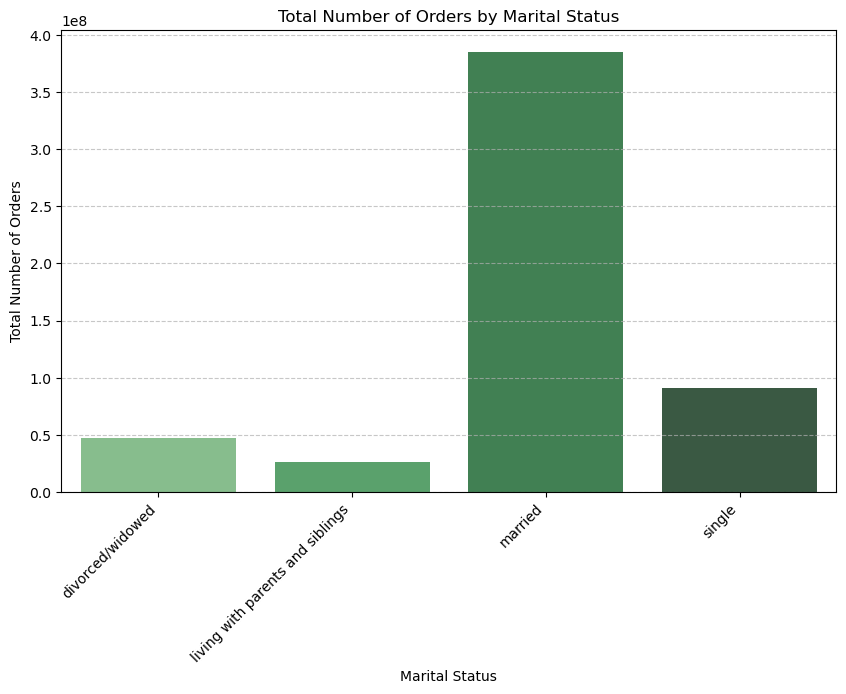

In [46]:
#  Bar Chart - Total Orders by Marital Status
plt.figure(figsize=(10, 6))
orders_by_status = df_reduced.groupby('marital_status')['order_number'].sum().reset_index()
sns.barplot(x='marital_status', y='order_number', data=orders_by_status, palette='Greens_d')
plt.title('Total Number of Orders by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the bar chart
status_barchart_path = os.path.join(output_path, 'barchart_orders_by_marital_status.png')
plt.savefig(status_barchart_path, dpi=300, bbox_inches='tight')
print(f"Bar chart for orders by marital status saved at: {status_barchart_path}")
plt.show()

What differences can you ﬁnd in ordering habits of different customer proﬁles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [48]:
# Subset the DataFrame to include relevant columns
df_customer_profile = df_la_excluded[['gender', 'customer_profile', 'prices']].copy()

In [56]:
# Calculate the average spend per customer profile
avg_spend_by_profile = df_customer_profile.groupby('customer_profile')['prices'].sum().sort_values(ascending=False)

C:\Users\kthav\AppData\Local\Temp\ipykernel_13044\3955436903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_by_profile.index, y=avg_spend_by_profile.values, palette='Set2')


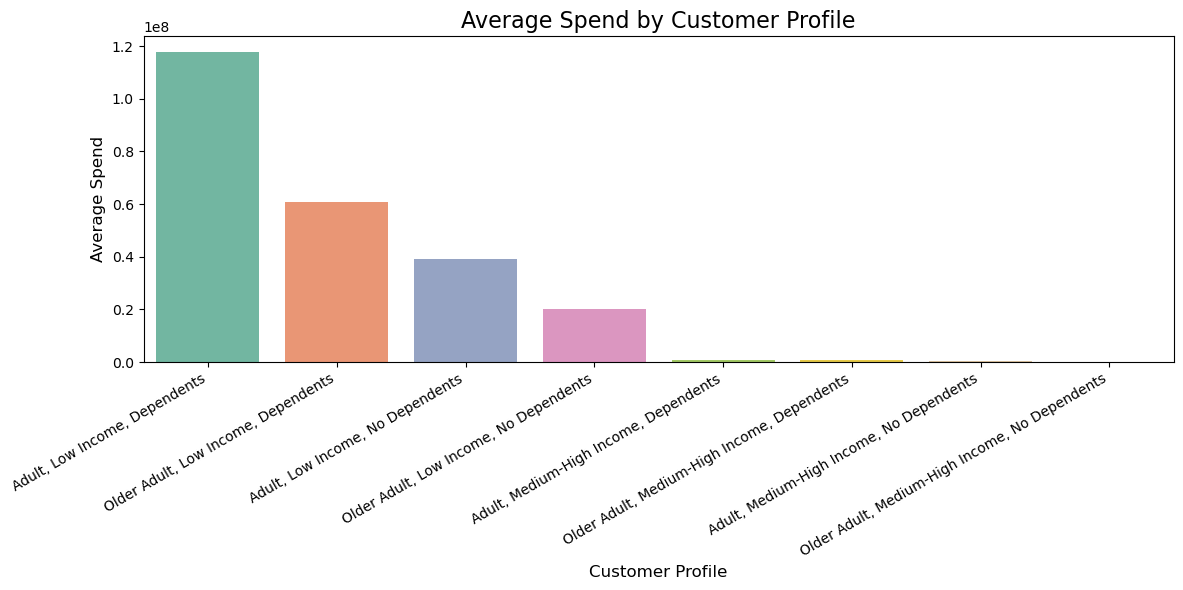

In [60]:
# Create a bar chart for average spend by customer profile
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spend_by_profile.index, y=avg_spend_by_profile.values, palette='Set2')

# Set title and axis labels
plt.title('Average Spend by Customer Profile', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotate and align labels to the right

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save and display the plot
plt.savefig(output_path + 'average_spend_by_customer_profile.png', dpi=300)
plt.show()


Create an appropriate visualization to show the distribution of profiles.

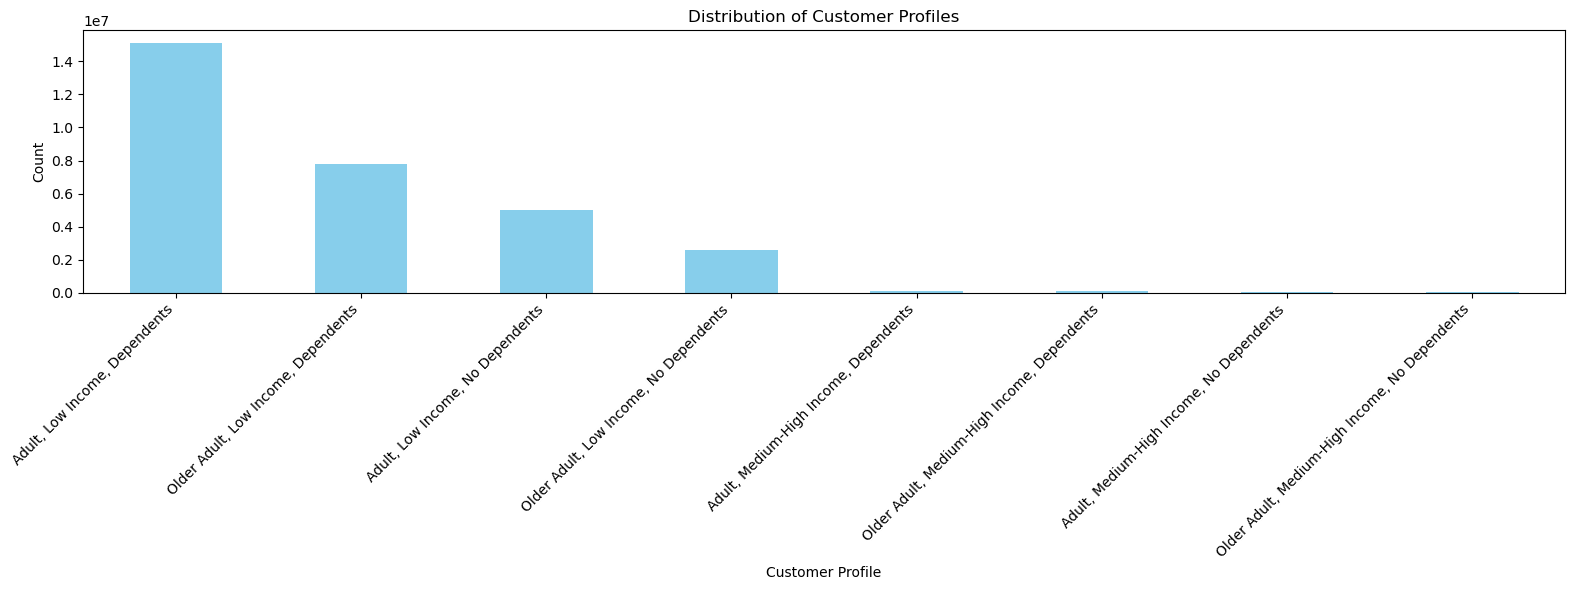

In [61]:
# Count the distribution of profiles
profile_counts = df_la_excluded['customer_profile'].value_counts()

# Plot the distribution
plt.figure(figsize=(16, 6))
profile_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Define the save path
path = r'C:\Users\kthav\My Pc\Desktop\Career Foundry\Data Immersion\Python Fundamentals for Data Analytics\11-12-2024 Instacart Basket Analysis'
file_name = 'dist_of_cust_prof_bar.png'
save_path = os.path.join(path, file_name)

# Save the plot
plt.savefig(save_path)

# Display the plot
plt.show()


In [63]:
# Aggregate the max, mean, and min for customer_frequency (usage_frequency) and average_spend (expenditure)
aggregated_data = df_la_excluded.groupby('customer_profile').agg({
    'customer_frequency': ['max', 'mean', 'min'],
    'average_spend': ['max', 'mean', 'min']
}).reset_index()

# Display the aggregated data
print(aggregated_data)


                                 customer_profile customer_frequency  \
                                                                 max   
0                   Adult, Low Income, Dependents               30.0   
1                Adult, Low Income, No Dependents               30.0   
2           Adult, Medium-High Income, Dependents               30.0   
3        Adult, Medium-High Income, No Dependents               30.0   
4             Older Adult, Low Income, Dependents               30.0   
5          Older Adult, Low Income, No Dependents               30.0   
6     Older Adult, Medium-High Income, Dependents               30.0   
7  Older Adult, Medium-High Income, No Dependents               30.0   

                 average_spend                      
       mean  min           max      mean       min  
0  9.960113  0.0     20.114286  7.789767  1.000000  
1  9.980068  0.0     16.294737  7.783810  1.000000  
2  9.285209  1.0     10.548876  7.785134  5.778947  
3  8.888572  2

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [48]:
# drop columns as the df is too big to merge
df_la_excluded = df_la_excluded[['department_id', 'customer_profile', 'region', 'customer_frequency', 'average_spend']]

In [50]:
df_la_excluded.head(10)

,department_id,customer_profile,region,customer_frequency,average_spend
0,7,"Adult, Low Income, Dependents",South,20.5,6.367797
1,16,"Adult, Low Income, Dependents",South,20.5,6.367797
2,19,"Adult, Low Income, Dependents",South,20.5,6.367797
3,19,"Adult, Low Income, Dependents",South,20.5,6.367797
4,17,"Adult, Low Income, Dependents",South,20.5,6.367797
5,7,"Adult, Low Income, Dependents",South,20.5,6.367797
6,19,"Adult, Low Income, Dependents",South,20.5,6.367797
7,19,"Adult, Low Income, Dependents",South,20.5,6.367797
8,4,"Adult, Low Income, Dependents",South,20.5,6.367797
9,19,"Adult, Low Income, Dependents",South,20.5,6.367797


In [52]:
# merge dataframes _df_la_excluded and df_dept as df_final
df_final = df_la_excluded.merge(dept_clean, on='department_id', indicator='created')

In [72]:
df_final.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_e4_10.pkl'))

In [54]:
# Aggregate data by customer profile, region, and department for frequency and spend statistics
aggregated_data_region = df_final.groupby(['customer_profile', 'region']).agg({
    'customer_frequency': ['max', 'mean', 'min'],
    'average_spend': ['max', 'mean', 'min']
}).reset_index()

aggregated_data_department = df_final.groupby(['customer_profile', 'department']).agg({
    'customer_frequency': ['max', 'mean', 'min'],
    'average_spend': ['max', 'mean', 'min']
}).reset_index()

# Display the aggregated data
print(aggregated_data_region.head())
print(aggregated_data_department.head())


                   customer_profile     region customer_frequency             \
                                                              max       mean   
0     Adult, Low Income, Dependents    Midwest               30.0  10.036766   
1     Adult, Low Income, Dependents  Northeast               30.0   9.860855   
2     Adult, Low Income, Dependents      South               30.0   9.948361   
3     Adult, Low Income, Dependents       West               30.0   9.956447   
4  Adult, Low Income, No Dependents    Midwest               30.0   9.820756   

       average_spend                      
   min           max      mean       min  
0  0.0     15.706667  7.792671  1.000000  
1  0.0     18.233333  7.765599  2.000000  
2  0.0     20.114286  7.795417  1.628571  
3  0.0     14.100000  7.791176  1.695238  
4  0.0     14.600000  7.801060  1.800000  
                customer_profile department customer_frequency             \
                                                           ma

In [ ]:
# Relevant columns
columns = ['region', 'customer_profile', 'average_spend']

# Subset the dataframe to include only relevant columns
df_subset = df_final[columns]

# Group by region and customer_profile, and calculate the average spend
profile_region_spend = df_subset.groupby(['region', 'customer_profile'])['average_spend'].mean().reset_index()

# Pivot data for visualization
pivot_data = profile_region_spend.pivot(index='region', columns='customer_profile', values='average_spend').fillna(0)

# Plot the bar chart
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')

# Customize the chart
plt.title('Average Spend by Region and Customer Profiles')
plt.xlabel('Region')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.legend(title='Customer Profiles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("region_customer_average_spend_analysis.png")

# Show the plot
plt.show()